In [1]:
from sklearn.model_selection import train_test_split

import numpy as np
import pandas as pd

In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/anvarnarz/praktikum_datasets/main/housing_LR.csv', index_col=0)
df.head()

,district,rooms,size,level,max_levels,price
0,Юнусабадский,3,57.0,4,4,52000.0
1,Яккасарайский,2,52.0,4,5,56000.0
2,Чиланзарский,2,42.0,4,4,37000.0
3,Чиланзарский,3,65.0,1,4,49500.0
4,Чиланзарский,3,70.0,3,5,55000.0


In [3]:
df.shape

(7278, 6)

In [4]:
housing = df[df.district == 'Чиланзарский']
housing.head()

,district,rooms,size,level,max_levels,price
2,Чиланзарский,2,42.0,4,4,37000.0
3,Чиланзарский,3,65.0,1,4,49500.0
4,Чиланзарский,3,70.0,3,5,55000.0
5,Чиланзарский,1,28.0,1,4,25500.0
6,Чиланзарский,1,30.0,2,4,21200.0


In [5]:
housing.shape

(1616, 6)

In [ ]:
from sklearn.model_selection import train_test_split 
train_test,test__set = train_test_split(housing,test_size=0.2,random_state=42)

In [7]:
from sklearn import linear_model
LR_model = linear_model.LinearRegression()


x_train = np.asanyarray(train_test[['size']])
y_train = np.asanyarray(train_test[['price']])

# Modelni tarbiyalaymiz
LR_model.fit(x_train,y_train)

# theta1 va theta2 koefsientlarini ajratin olamiz
theta1 = LR_model.coef_[0][0]
theta0 = LR_model.intercept_[0]

print(theta1)
print(theta0)

753.8444656913779
-1009.2734590636028


In [8]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

Text(0, 0.5, 'price')

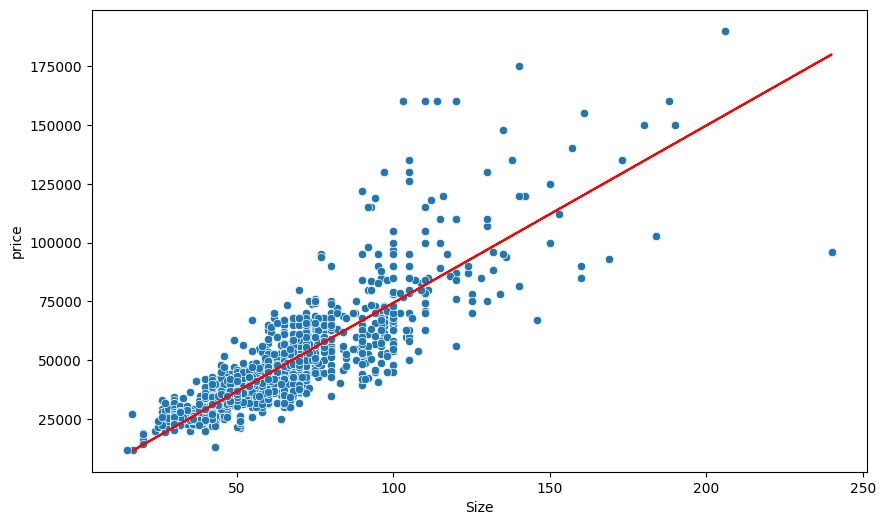

In [9]:
plt.figure(figsize=(10,6))
sns.scatterplot(data=housing,x='size',y='price')
plt.plot(x_train,theta1*x_train+theta0,'-r')
plt.xlabel("Size")
plt.ylabel('price')

# Modelni baholash

In [12]:
x_test = np.asanyarray(test__set[['size']])
y_test = np.asanyarray(test__set[['price']])

In [13]:
y_predict = LR_model.predict(x_test)

In [16]:
from sklearn.metrics import mean_absolute_error,mean_squared_error

MAE = mean_absolute_error(y_test,y_predict)
RMSE = np.sqrt(mean_squared_error(y_test,y_predict))

print(f"{MAE=}")
print(f"{RMSE=}")

MAE=7796.767463621409
RMSE=np.float64(12812.549962713074)
